# Gaussian Proess Exercise on a CSV dataset and sampling from it later. 

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
# plt.style.use('dark_background')
import GPy

In [2]:
# print(plt.style.available)

## 1. Import the dataset

In [3]:
# Import datasets as pandas
import pandas as pd
# data_set = loadmat("Mark_4sec_CA1PSD_ISO_freqamp_020619.mat")
CA1_df = pd.read_csv("Mark_4sec_CA3PSD_ISO_freqamp_020619.csv")
CA1_df

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
0,17,30,1.066899e-07,4.362881e-09,6.410145e-10,6.153980e-10,4.952555e-10,3.655776e-10,6.689563e-10,4.548710e-10,...,9.614848e-13,5.535816e-13,3.549981e-13,2.959776e-13,6.462898e-13,9.176671e-13,7.071067e-13,7.704253e-13,1.278144e-12,6.975427e-13
1,42,40,9.644295e-08,1.100460e-09,3.698362e-10,1.196834e-10,1.135362e-10,1.471786e-10,3.404247e-10,4.498116e-10,...,1.350018e-12,1.003581e-12,7.857398e-13,1.141451e-12,8.279703e-13,1.007723e-12,1.160121e-12,9.708206e-13,5.918814e-13,7.502253e-13
2,35,30,9.664707e-08,1.686739e-09,1.383835e-09,9.779574e-10,2.740501e-10,2.981321e-10,3.574340e-10,4.000314e-10,...,1.167509e-12,7.559837e-13,1.333016e-12,1.637356e-12,2.252303e-12,9.505286e-13,1.173716e-12,1.199101e-12,8.871386e-13,9.026766e-13
3,23,50,9.750570e-08,1.306145e-09,3.598379e-10,2.804073e-10,2.125693e-10,2.026804e-10,2.883272e-10,2.668982e-10,...,1.366467e-12,2.443904e-12,2.535353e-12,1.229021e-12,9.005429e-13,1.069436e-12,9.512349e-13,7.234959e-13,1.241802e-12,8.649545e-13
4,42,50,1.020247e-07,5.254584e-09,4.163858e-09,1.331331e-09,4.225174e-10,6.844851e-10,1.042377e-09,2.894596e-10,...,8.403170e-13,5.947037e-13,7.975147e-13,1.019247e-12,1.142941e-12,1.185287e-12,9.356042e-13,1.085042e-12,8.461304e-13,4.135749e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,29,40,9.438211e-08,8.953157e-10,5.325697e-10,4.034846e-10,3.847985e-10,7.124458e-10,6.019659e-10,5.045601e-10,...,3.915490e-13,3.560932e-13,3.947136e-13,3.543831e-13,5.283461e-13,2.827943e-13,3.592653e-13,4.569682e-13,3.788961e-13,4.503580e-13
380,17,50,9.503613e-08,1.012707e-09,3.889901e-10,2.982987e-10,2.975021e-10,3.704936e-10,7.720063e-10,5.561578e-10,...,3.057599e-13,3.755007e-13,3.242915e-13,2.136803e-13,2.412199e-13,2.010544e-13,2.495399e-13,5.407236e-13,3.228808e-13,3.071144e-13
381,42,30,9.467551e-08,1.790015e-09,1.131069e-09,1.480148e-09,1.404767e-09,1.095754e-09,7.758978e-10,1.129526e-09,...,5.972925e-13,7.388474e-13,4.952310e-13,4.230530e-13,3.500203e-13,3.113596e-13,4.071015e-13,6.988792e-13,6.040085e-13,3.130020e-13
382,7,50,9.344372e-08,8.772011e-10,4.970744e-10,5.333557e-10,4.927356e-10,7.601632e-10,6.495486e-10,4.785051e-10,...,2.582216e-13,2.178556e-13,1.779925e-13,2.533067e-13,1.734665e-13,1.106245e-13,1.546325e-13,3.050555e-13,3.590836e-13,3.578827e-13


In [4]:
CA1_df.describe()

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
count,384.000000,384.000000,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,...,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,21.125000,25.000000,9.876748e-08,1.483792e-09,7.216810e-10,5.297563e-10,4.963279e-10,5.403563e-10,5.392557e-10,4.841397e-10,...,6.546182e-13,6.091531e-13,5.459146e-13,5.131811e-13,4.991757e-13,4.661958e-13,4.738421e-13,4.716295e-13,4.689914e-13,4.309777e-13
std,12.630313,17.100532,2.344670e-08,9.873200e-10,4.625125e-10,2.804616e-10,2.457717e-10,2.871590e-10,2.926409e-10,2.888415e-10,...,3.599384e-13,3.487042e-13,3.449344e-13,3.213658e-13,2.975148e-13,2.591702e-13,2.692950e-13,2.528458e-13,2.351999e-13,2.110681e-13
min,5.000000,0.000000,9.224978e-08,4.018869e-10,1.779852e-10,1.196834e-10,8.558949e-11,5.937738e-11,5.033034e-11,3.842182e-11,...,1.292999e-13,1.297780e-13,6.882206e-14,6.250159e-14,7.442178e-14,1.030722e-13,1.097927e-13,1.147326e-13,1.041554e-13,1.374316e-13
25%,10.000000,10.000000,9.467907e-08,7.756680e-10,3.950088e-10,3.139932e-10,3.081002e-10,3.292297e-10,3.149414e-10,2.533371e-10,...,3.921124e-13,3.629012e-13,3.203597e-13,2.946486e-13,2.972690e-13,2.745972e-13,2.990072e-13,3.003718e-13,3.096119e-13,2.838366e-13
50%,20.000000,25.000000,9.589994e-08,1.195470e-09,5.937907e-10,4.923716e-10,4.553629e-10,5.000206e-10,5.065640e-10,4.327971e-10,...,5.770754e-13,5.490138e-13,4.637024e-13,4.273831e-13,4.251277e-13,4.168663e-13,3.992897e-13,4.026246e-13,4.029964e-13,3.855960e-13
75%,30.500000,40.000000,9.758217e-08,1.902026e-09,9.339533e-10,6.661477e-10,6.518402e-10,7.017185e-10,7.320325e-10,6.748503e-10,...,8.488597e-13,7.562070e-13,6.810909e-13,6.549298e-13,6.422870e-13,5.835571e-13,5.901386e-13,5.815182e-13,5.953072e-13,5.269147e-13
max,42.000000,50.000000,4.962646e-07,6.308812e-09,4.163858e-09,2.628835e-09,1.482603e-09,1.520968e-09,1.659829e-09,1.703842e-09,...,2.595211e-12,2.443904e-12,2.535353e-12,2.213978e-12,2.458930e-12,2.006133e-12,2.530077e-12,1.943353e-12,1.592802e-12,1.795189e-12


In [5]:
# Finding the columns representing freq 32 to 50 Hz
# np.r_[0:2, 32:52]

###### 2. Finding the stimulation frequency and amplitude and pre stimulus gamma columns 

In [6]:
# gamma = np.arange(32,51)
# print(gamma)
print(CA1_df.iloc[1, np.r_[0:2, 33:52]])

Stim_1    4.200000e+01
Stim_2    4.000000e+01
Xk0_32    3.920551e-11
Xk0_33    2.185532e-11
Xk0_34    1.065976e-11
Xk0_35    1.248434e-11
Xk0_36    2.544466e-11
Xk0_37    1.974901e-11
Xk0_38    7.941763e-12
Xk0_39    1.519301e-11
Xk0_40    1.555842e-11
Xk0_41    1.090195e-11
Xk0_42    8.529903e-12
Xk0_43    7.444033e-12
Xk0_44    3.461845e-12
Xk0_45    6.004862e-12
Xk0_46    1.083304e-11
Xk0_47    7.732998e-12
Xk0_48    5.337480e-12
Xk0_49    8.791972e-12
Xk0_50    5.464634e-12
Name: 1, dtype: float64


# sum of pre stimulation gamma

data = np.sum(CA1_df.iloc[:, 33:52], axis=1)
sum_preStim_gamma = pd.DataFrame(data=data, columns=['sum_preStim_gamma'])
np.shape(sum_preStim_gamma)
sum_preStim_gamma

## 3. Select the gamma freq. stimulations

CA1_df_gamma = CA1_df[CA1_df['Stim_1']>32]
CA1_df_gamma

In [7]:
# calculate mean psd for Post Stim. Gamma, the Xk1
Y = np.sum(CA1_df.iloc[:, 133:152],axis=1)
Y = pd.DataFrame({'Y':Y})
print(np.shape(Y))
# Y.reset_index(drop=True, inplace=True)
# Y_reshape =Y[:, np.newaxis]
Y.describe()
# print(np.shape(Y_reshape))

(384, 1)


,Y
count,3.840000e+02
mean,1.305258e-09
std,1.023751e-09
min,9.442787e-11
25%,5.366985e-10
50%,9.944630e-10
75%,1.780588e-09
max,4.827246e-09


In [33]:
# Need to bring up the values to integer values. 1e-9 is too small 
Y= Y*1e9
Y.describe

<bound method NDFrame.describe of             Y
0    3.644022
1    2.952149
2    3.613921
3    1.668010
4    2.854172
..        ...
379  0.701020
380  0.987109
381  1.817511
382  0.840083
383  1.125681

[384 rows x 1 columns]>

Text(0.5, 0, 'Sum PostStim Gamma')

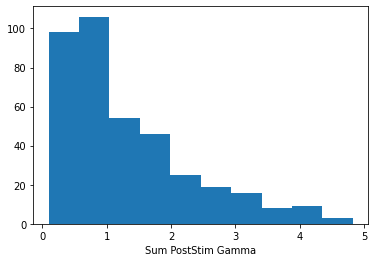

In [34]:
plt.hist(Y, bins=10)
plt.xlabel("Sum PostStim Gamma")

## 4. One dimensional GP

In [35]:
X = CA1_df.iloc[:,  0:1]
X
print(np.shape(X))

(384, 1)


In [36]:
X.head()

,Stim_1
0,17
1,42
2,35
3,23
4,42


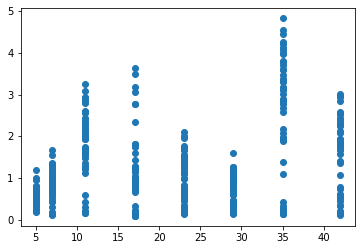

In [37]:
X.describe()
#plt.hist(X, bins=10)
plt.scatter(X,Y)

In [38]:
pow(X.std(),2)

Stim_1    159.524804
dtype: float64

In [39]:
X['Stim_1']

0      17
1      42
2      35
3      23
4      42
       ..
379    29
380    17
381    42
382     7
383    23
Name: Stim_1, Length: 384, dtype: int64

In [40]:
Y['Y']

0      3.644022
1      2.952149
2      3.613921
3      1.668010
4      2.854172
         ...   
379    0.701020
380    0.987109
381    1.817511
382    0.840083
383    1.125681
Name: Y, Length: 384, dtype: float64

for idx in x_unique:
    # find mean of each freq
    Y[X['Stim_1']==idx]= np.mean(Y[X['Stim_1']==idx])

Y = Y*1000000000

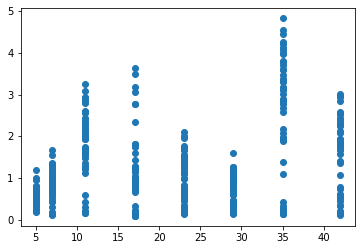

In [41]:
plt.scatter(X, Y)

## 5. Defining Kernel, initializing a GP Regression model, plotting, and optimizing 

X.reset_index(drop=True, inplace=True)
X

In [64]:
# define kernel
# ker = GPy.kern.RBF(input_dim=1, lengthscale=1)
ker = GPy.kern.Matern52(input_dim=1, variance=2., lengthscale=1., ARD=True) + GPy.kern.White(1)

In [65]:
X_reshape = X['Stim_1']
np.shape(X_reshape)
X_reshape = np.expand_dims(X_reshape,axis=1)
print(np.shape(X_reshape))

Y_reshape = Y['Y']
Y_reshape = np.expand_dims(Y_reshape, axis=1)
print(np.shape(Y_reshape))

(384, 1)
(384, 1)


In [66]:
# create simple GP model

m = GPy.models.GPRegression(X_reshape,Y_reshape,ker)
display(m)

GP_regression.,value,constraints,priors
sum.Mat52.variance,2.0,+ve,
sum.Mat52.lengthscale,1.0,+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


GP_regression.,value,constraints,priors
sum.Mat52.variance,2.0,+ve,
sum.Mat52.lengthscale,1.0,+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


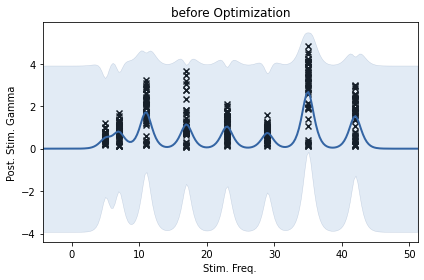

In [67]:
fig1 = m.plot(legend=False, xlabel='Stim. Freq.', ylabel='Post. Stim. Gamma',
              title="before Optimization");
display(m);
# ax = plt.gca()
# PCM = ax.get_children()[0]
# plt.colorbar(PCM, ax=ax);

In [68]:
# Constrain to positive values
# m.rbf.constrain_negative()
# display(m)
# m.kern.constrain_positive()
# m.kern.constrain_negative()

In [69]:
# optimize and plot
m.optimize(messages=True,max_f_eval = 1000);

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s16  0005   4.732236e+02   2.224527e+01 
    01s12  0035   4.696285e+02   2.986862e-09 
Runtime:     01s12
Optimization status: Converged



GP_regression.,value,constraints,priors
sum.Mat52.variance,1.9241664044232265,+ve,
sum.Mat52.lengthscale,7.154190522701066,+ve,
sum.white.variance,0.3092139712419488,+ve,
Gaussian_noise.variance,0.3092139712419488,+ve,


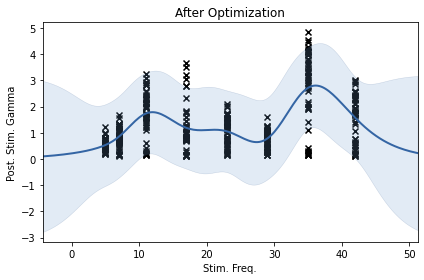

In [70]:
figure = m.plot(legend=False, xlabel='Stim. Freq.' , ylabel='Post. Stim. Gamma', title='After Optimization');
display(m)

### 5.1: sampling one Std Dev minus median

In [71]:
rand_freq_1d = np.random.choice([5,7,11,17, 23, 35, 42], size=(100))
rand_freq_1d_sorted = np.sort(rand_freq_1d)
# np.shape(rand_freq)
print(rand_freq_1d[0:10], '\n', rand_freq_1d_sorted[0:10])
rand_amp_1d = np.random.choice([10,20,30,40,50], size=(100))
rand_amp_1d_sorted = np.sort(rand_amp_1d)
print(rand_amp_1d[0:10], '\n', rand_amp_1d_sorted[0:10])
np.shape(rand_amp_1d_sorted)

[17  7 23 23  5 17 23 35  5 17] 
 [5 5 5 5 5 5 5 5 5 5]
[50 10 40 30 40 20 10 30 20 10] 
 [10 10 10 10 10 10 10 10 10 10]


(100,)

Text(0, 0.5, 'frequencies')

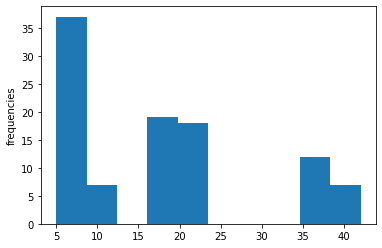

In [72]:
plt.hist(rand_freq_1d, bins=10)
plt.ylabel("frequencies")

In [73]:
# Calculate the median
# Calculate one Std Dev plus median
median_rand_freq_1d = np.median(rand_freq_1d)
print("Median rand_freq_1d: ", median_rand_freq_1d)

SD_rand_freq_1d = np.std(rand_freq_1d)
print("Std Dev of rand_freq_1d: ", SD_rand_freq_1d)

Median rand_freq_1d:  17.0
Std Dev of rand_freq_1d:  11.674326533038212


In [74]:
OneSD_minus_rand_freq_1d = np.empty((100))

OneSD_minus_rand_freq_1d[:] = int(median_rand_freq_1d - SD_rand_freq_1d)
OneSD_minus_rand_freq_1d[0]

5.0

In [75]:
testX = np.array([OneSD_minus_rand_freq_1d]) #52 , 50
print(np.shape(testX))
testX = np.transpose(testX)
print(testX[0])
np.shape(testX)

(1, 100)
[5.]


(100, 1)

In [76]:
posteriorTestY = np.empty((100))
simY  = np.empty((100))
simMse = np.empty((100))

posteriorTestY = m.posterior_samples_f(testX, full_cov=True, size=1)
# print(np.shape(m.predict(testX)))
simY, simMse = m.predict(testX)

print("mean is: \n",simY[99],"\n\n Variance is: \n", simMse[99])
# posteriorTestY
print(np.shape(posteriorTestY),'\n',posteriorTestY[:,0,0])

mean is: 
 [0.53109641] 

 Variance is: 
 [0.63034891]
(100, 1, 1) 
 [ 0.43253471  0.68663671  0.65765666  1.36325367 -0.6353703   0.0617349
  0.16490814  0.77963424  0.69467715  0.2265149   0.26230821 -0.40490887
 -0.49645955  0.17256372 -0.1772413   0.22465958 -0.75685859  0.76688638
  0.04773583  0.87039623  0.66748434  0.54338999  0.03721444  0.57872111
  0.82487478 -0.05678668  0.17434201  0.13214387  1.09774132  0.50426228
  0.20470631  1.01319322  0.1533779  -0.61236439  0.40081879  0.75809935
  0.48185719  0.38665858  0.83506478  0.31433033 -0.44706835  1.73273446
  0.56465553  0.68727259  0.53452868  0.64320934  0.09490437  1.21000685
  0.20662069 -0.08423577  1.51793791  0.49165671 -0.36380268  0.903322
  0.9244381   0.6299743   0.33196123 -0.09734601 -0.1946897   0.47652335
  1.41165865  0.6230931  -0.01240599 -0.26459718  2.25252598 -0.2341527
  1.03510704  0.587736    0.20696192 -0.24182627  0.12974984 -0.19081559
  0.40027639  0.14748092  1.63648226 -0.35265807  0.0937861

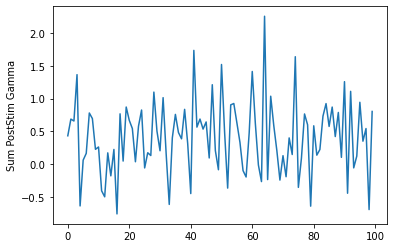

In [77]:
# plt.hist(posteriorTestY[:,0,0], bins=10)
plt.ylabel("Sum PostStim Gamma")
plt.plot(posteriorTestY[:,0,0])
plt.show()

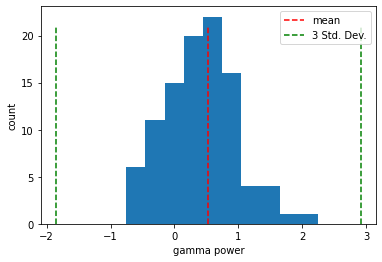

In [78]:
n, bins, patches = plt.hist(posteriorTestY[:,0,0], bins=10)
max_n = int(max(n))
plt.plot(simY[0:max_n], np.arange(0,max_n),'r--')
plt.plot(simY[0:max_n] - 3 * simMse[0:max_n] ** 0.5, np.arange(0,max_n),'--g')
plt.plot(simY[0:max_n] + 3 * simMse[0:max_n] ** 0.5, np.arange(0,max_n), '--g')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["mean","3 Std. Dev."])
plt.show()

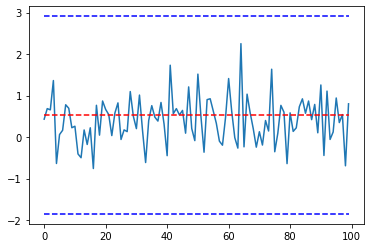

In [79]:
plt.plot(posteriorTestY[:,0,0])
plt.plot(simY, 'r--')
plt.plot(simY + 3 * simMse** 0.5, 'b--')
plt.plot(simY - 3 * simMse** 0.5, 'b--')
plt.show()

## 5.2: Sampling One SD plus median

In [80]:
OneSD_plus_rand_freq_1d = np.empty((100))

OneSD_plus_rand_freq_1d[:] = int(median_rand_freq_1d + SD_rand_freq_1d)
OneSD_plus_rand_freq_1d[0]

28.0

In [81]:
testX_plus = np.array([OneSD_plus_rand_freq_1d]) #52 , 50
print(np.shape(testX_plus))
testX_plus = np.transpose(testX_plus)
print(testX_plus[0])
np.shape(testX_plus)

(1, 100)
[28.]


(100, 1)

In [82]:
posteriorTestY_plus = np.empty((100))
simY_plus  = np.empty((100))
simMse_plus = np.empty((100))

posteriorTestY_plus = m.posterior_samples_f(testX_plus, full_cov=True, size=1)[:,0,0]
# print(np.shape(m.predict(testX)))
simY_plus, simMse_plus = m.predict(testX_plus)

print("mean is: \n",simY_plus[99],"\n\n Variance is: \n", simMse_plus[99])
# posteriorTestY
print(np.shape(posteriorTestY_plus),'\n',posteriorTestY_plus)

mean is: 
 [0.65977184] 

 Variance is: 
 [0.65162835]
(100,) 
 [ 2.16675794e-01  3.94845761e-01  8.26051551e-02  8.24891290e-01
 -1.14581569e+00  2.97108741e-01  7.77141571e-01  5.93588379e-01
 -2.39944832e-01  1.32210427e+00  7.87945117e-02  4.62838142e-01
  6.85270080e-01  2.01936942e+00 -1.59386214e-01  1.25421376e-01
  6.98947366e-01  4.34280120e-01  7.48716484e-01  1.12506328e+00
  7.43684716e-01  8.55741218e-01  1.02436717e+00  1.08357823e+00
  3.75449041e-01  1.26139495e+00  4.94707838e-01  1.11433924e+00
  4.58317118e-01  4.40250076e-01  5.77726459e-01  1.38056650e+00
  2.54756546e-01  9.86139097e-01  5.16791687e-01 -5.28888218e-02
 -6.53372466e-04  2.43995079e-01  8.76045551e-01  1.57940538e-01
  2.26757571e-01  1.93042402e-01  6.96190140e-01  5.59583251e-01
  1.53687457e+00  5.74899034e-01  1.12237275e+00 -1.26927035e-01
  1.87210150e-01  9.29742711e-02  2.90830439e-01  6.29779576e-01
 -8.64544746e-01  1.27709819e+00  4.14134880e-01  6.52954784e-01
 -1.48789628e-01  4.082684

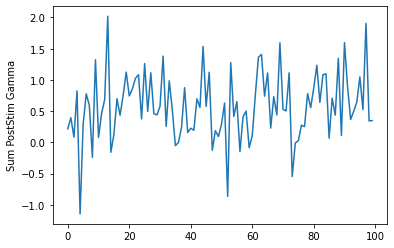

In [83]:
plt.ylabel("Sum PostStim Gamma")
plt.plot(posteriorTestY_plus)
plt.show()

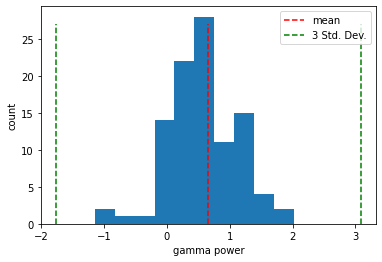

In [84]:
n, bins, patches = plt.hist(posteriorTestY_plus, bins=10)
max_n = int(max(n))
plt.plot(simY_plus[0:max_n], np.arange(0,max_n),'r--')
plt.plot(simY_plus[0:max_n] - 3 * simMse_plus[0:max_n] ** 0.5, np.arange(0,max_n),'--g')
plt.plot(simY_plus[0:max_n] + 3 * simMse_plus[0:max_n] ** 0.5, np.arange(0,max_n), '--g')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["mean","3 Std. Dev."])
plt.show()

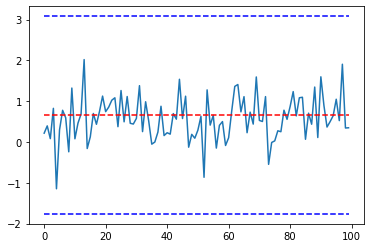

In [85]:
plt.plot(posteriorTestY_plus)
plt.plot(simY_plus, 'r--')
plt.plot(simY_plus + 3 * simMse_plus** 0.5, 'b--')
plt.plot(simY_plus - 3 * simMse_plus** 0.5, 'b--')
plt.show()

## 6. 2D GP

In [55]:
X = CA1_df.iloc[:,  0:2]
X
print(np.shape(X))
X.head()

(384, 2)


,Stim_1,Stim_2
0,17,30
1,42,40
2,35,30
3,23,50
4,42,50


Text(0.5, 0, 'Sum. Post Stim gamma')

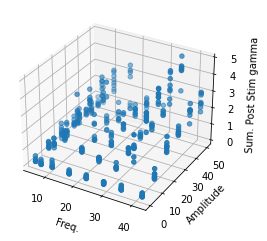

In [59]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X['Stim_1'],X['Stim_2'], Y['Y'])
ax.set_xlabel('Freq.')
ax.set_ylabel('Amplitude')
ax.set_zlabel('Sum. Post Stim gamma')